
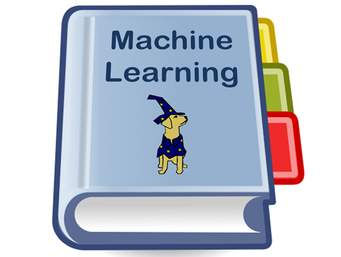




## **PROJECT:**
# **Marketing campaign for Banking Products** 








## **1.Import the datasets and libraries,check datatype,statistical summary,shape,null values etc**

In [ ]:
 #################### importing the libraries  ####################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=(10,6)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data (1).csv


In [ ]:
import io
dataset=pd.read_csv(io.BytesIO(uploaded['data.csv']))
dataset.head(5000)  #display the top 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
  #################### display the bottom 5 rows  ####################
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
 #################### displays the datatype of each column and also display the non-null rows fro each column.  ####################
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
dataset.shape

(5000, 14)

In [ ]:
 #################### To display the summary stats which include count,mean,standard,minimum,maximum...etc ####################
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
 #################### prints the specific columns #################### 
a=dataset.loc[0:25,"Experience":"Income"	]
print(a)

    Experience  Income
0            1      49
1           19      34
2           15      11
3            9     100
4            8      45
5           13      29
6           27      72
7           24      22
8           10      81
9            9     180
10          39     105
11           5      45
12          23     114
13          32      40
14          41     112
15          30      22
16          14     130
17          18      81
18          21     193
19          28      21
20          31      25
21          27      63
22           5      62
23          18      43
24          11     152
25          19      29


In [ ]:
 ####################  displays the how many null values are present in each column  #################### 
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# **2.Cleaning the data for variables**
## Dropping irrelevant columns

In a machine learning model,it is necessary to seperate signal from the noise.Hence the ID column which definitely doesn't have any signal is being dropped.Also, the experience column seems to have faulty data as some values are negative.we can replace and impute those values,but here we drop the column as well,as it seems to be highly coorelated with the age column.

In [ ]:
exp=dataset['Experience']
edu=dataset['Age']
correlation=exp.corr(edu)
correlation

0.9942148569683321

In [ ]:
dataset=dataset.drop(['ID'],axis=1)
dataset.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
 #################### In dataset values lessthan '0' is assigned to Nan  #################### 
dataset[dataset<0]=np.nan
dataset.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,4948.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.331043,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.311973,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.750000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
 #################### Nan numbers are assigned to median values   ####################
group=dataset.groupby('Experience')['Experience'].median()
dataset['Experience']=dataset.merge(group,left_on='Experience',right_index=True)
dataset.Experience.fillna(dataset.Experience)

0        1.0
1       19.0
2       15.0
3        9.0
4        8.0
        ... 
4995     3.0
4996     4.0
4997    39.0
4998    40.0
4999     4.0
Name: Experience, Length: 5000, dtype: float64

In [ ]:
dataset=dataset.drop(['Experience'],axis=1)
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


# **3.EDA**

## Number of unique in each column




In [ ]:
 #################### number o funique in each column  ####################
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
dataset=dataset.drop(['ZIP Code'],axis=1)
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


## Number of people with zero mortgage

In [ ]:
 ####################  Number of people with 0 mortgage  ####################
(dataset.Mortgage==0).sum()

3462

## Number of people with zero creditcard spending per month

In [ ]:
 ###################  Number of people with 0 credit card spending per month  ####################
(dataset.CCAvg==00).sum()

106

## Value counts of all categorical columns

In [ ]:
 #################### Value count for all categorical columns  ####################
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
dataset['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

## Univariate Analysis

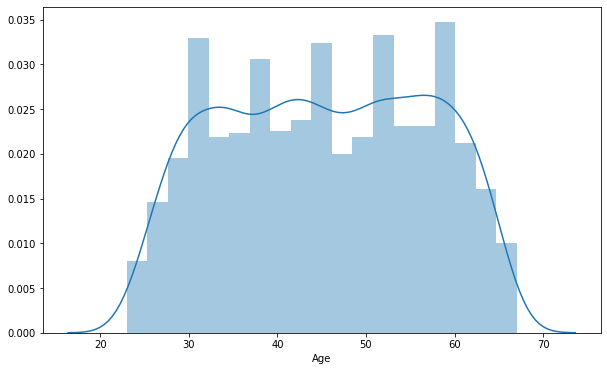

In [ ]:
 #################### univariate analysis ####################
# age seems to have symmetric distribution
sns.distplot(dataset.Age)

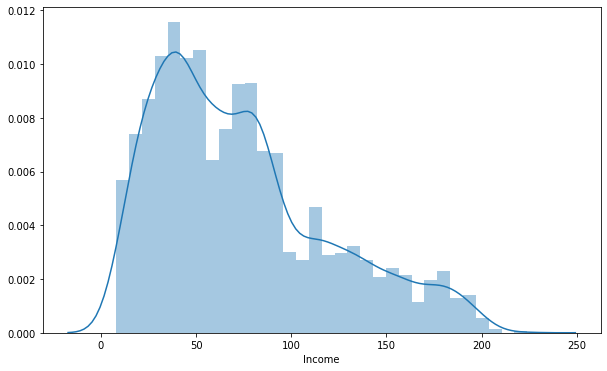

In [ ]:
 #################### Income is right skewed distribution  ####################
sns.distplot(dataset.Income)

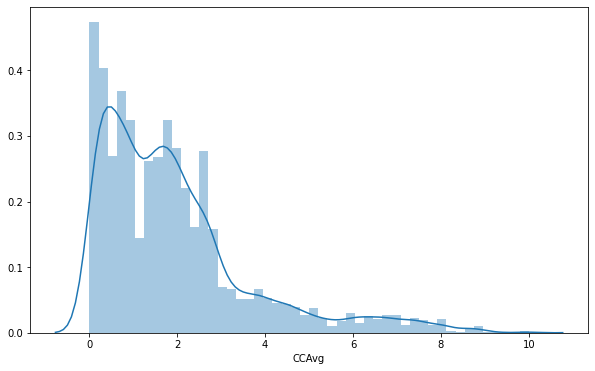

In [ ]:
 #################### Credit card Average is right skewed distribution  ####################
sns.distplot(dataset.CCAvg)

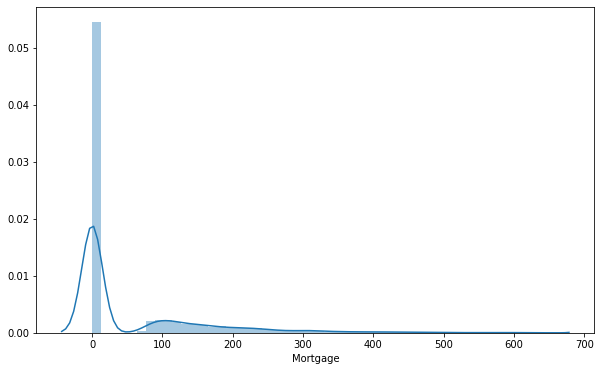

In [ ]:
 #################### Mortgage column seems highly skewed  ####################
sns.distplot(dataset.Mortgage)

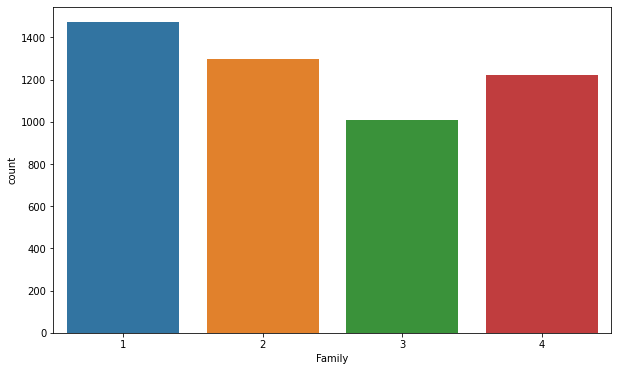

In [ ]:
sns.countplot(dataset.Family)

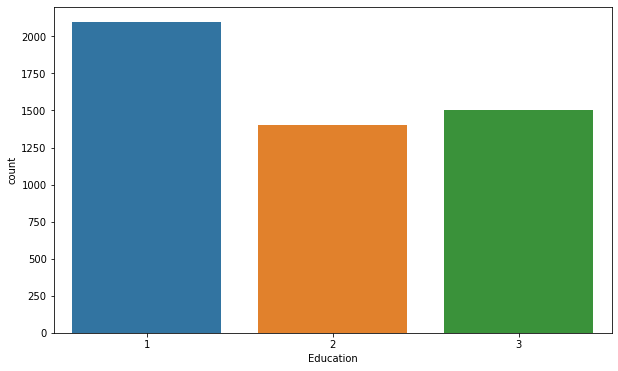

In [ ]:
sns.countplot(dataset.Education)

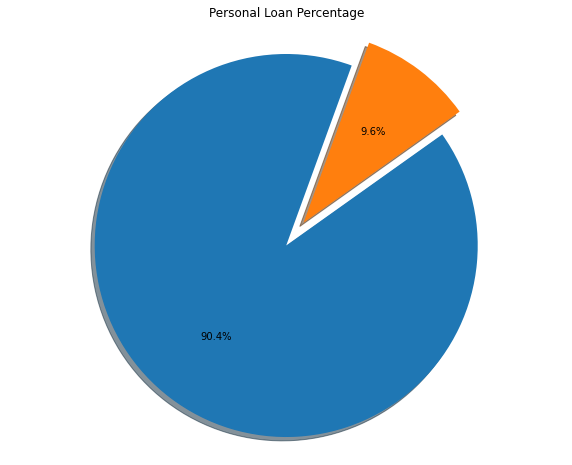

In [ ]:
 ####################  pie chart which shows the percentage of personal loan  ####################
tempdf =pd.DataFrame(dataset["Personal Loan"].value_counts()).reset_index()
tempdf.columns=["Labels","Personal Loan"]
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempdf["Personal Loan"],explode=explode,autopct='%1.1f%%',
        shadow=True,startangle=70)
ax1.axis('equal')
plt.title("Personal Loan Percentage")
plt.show()

# multivariant analysis

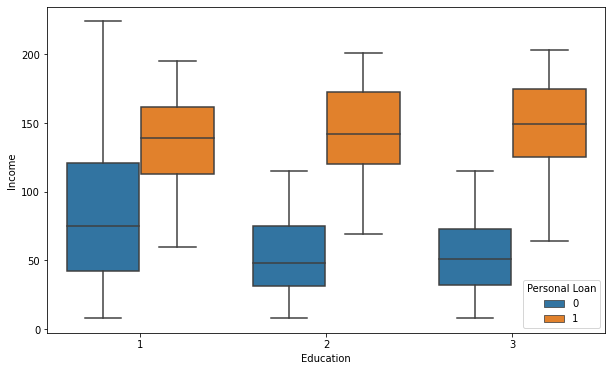

In [ ]:
 ####################  It seems the customers whose has more income is granted loan across each education level  ####################
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset)

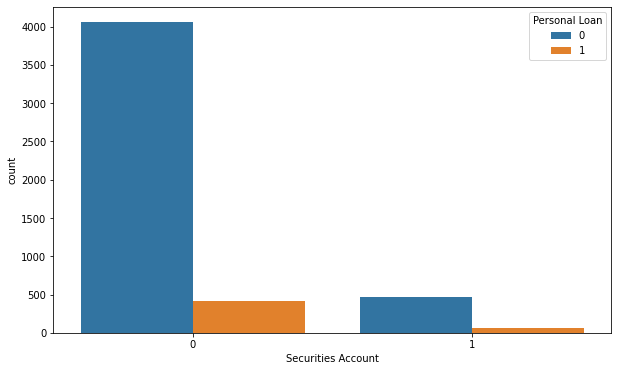

In [ ]:
 #################### Majority of the people having securities acoount don't have personal loan  ####################
sns.countplot(x="Securities Account",data=dataset,hue="Personal Loan")

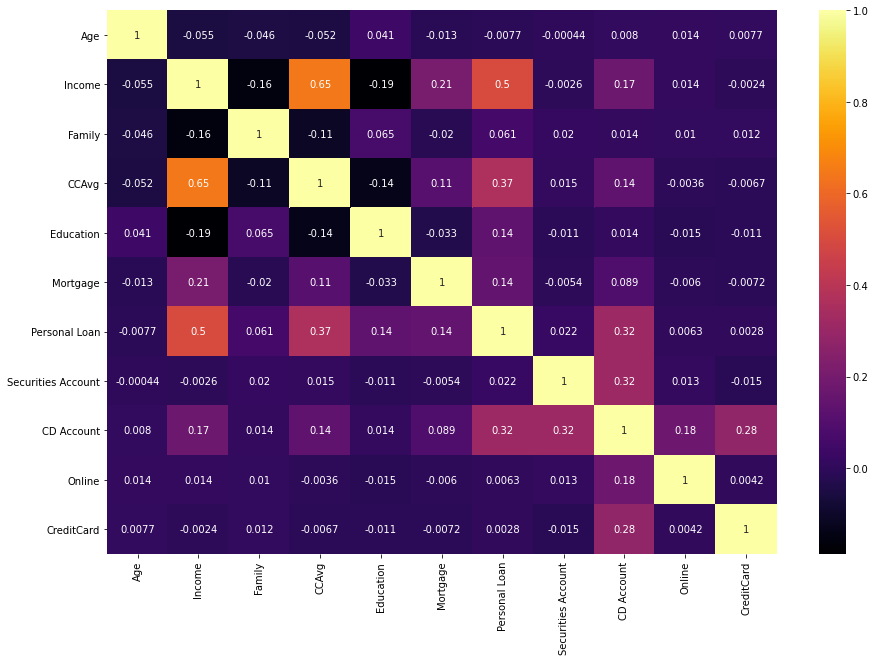

In [ ]:
################### credit card average and income ####################
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

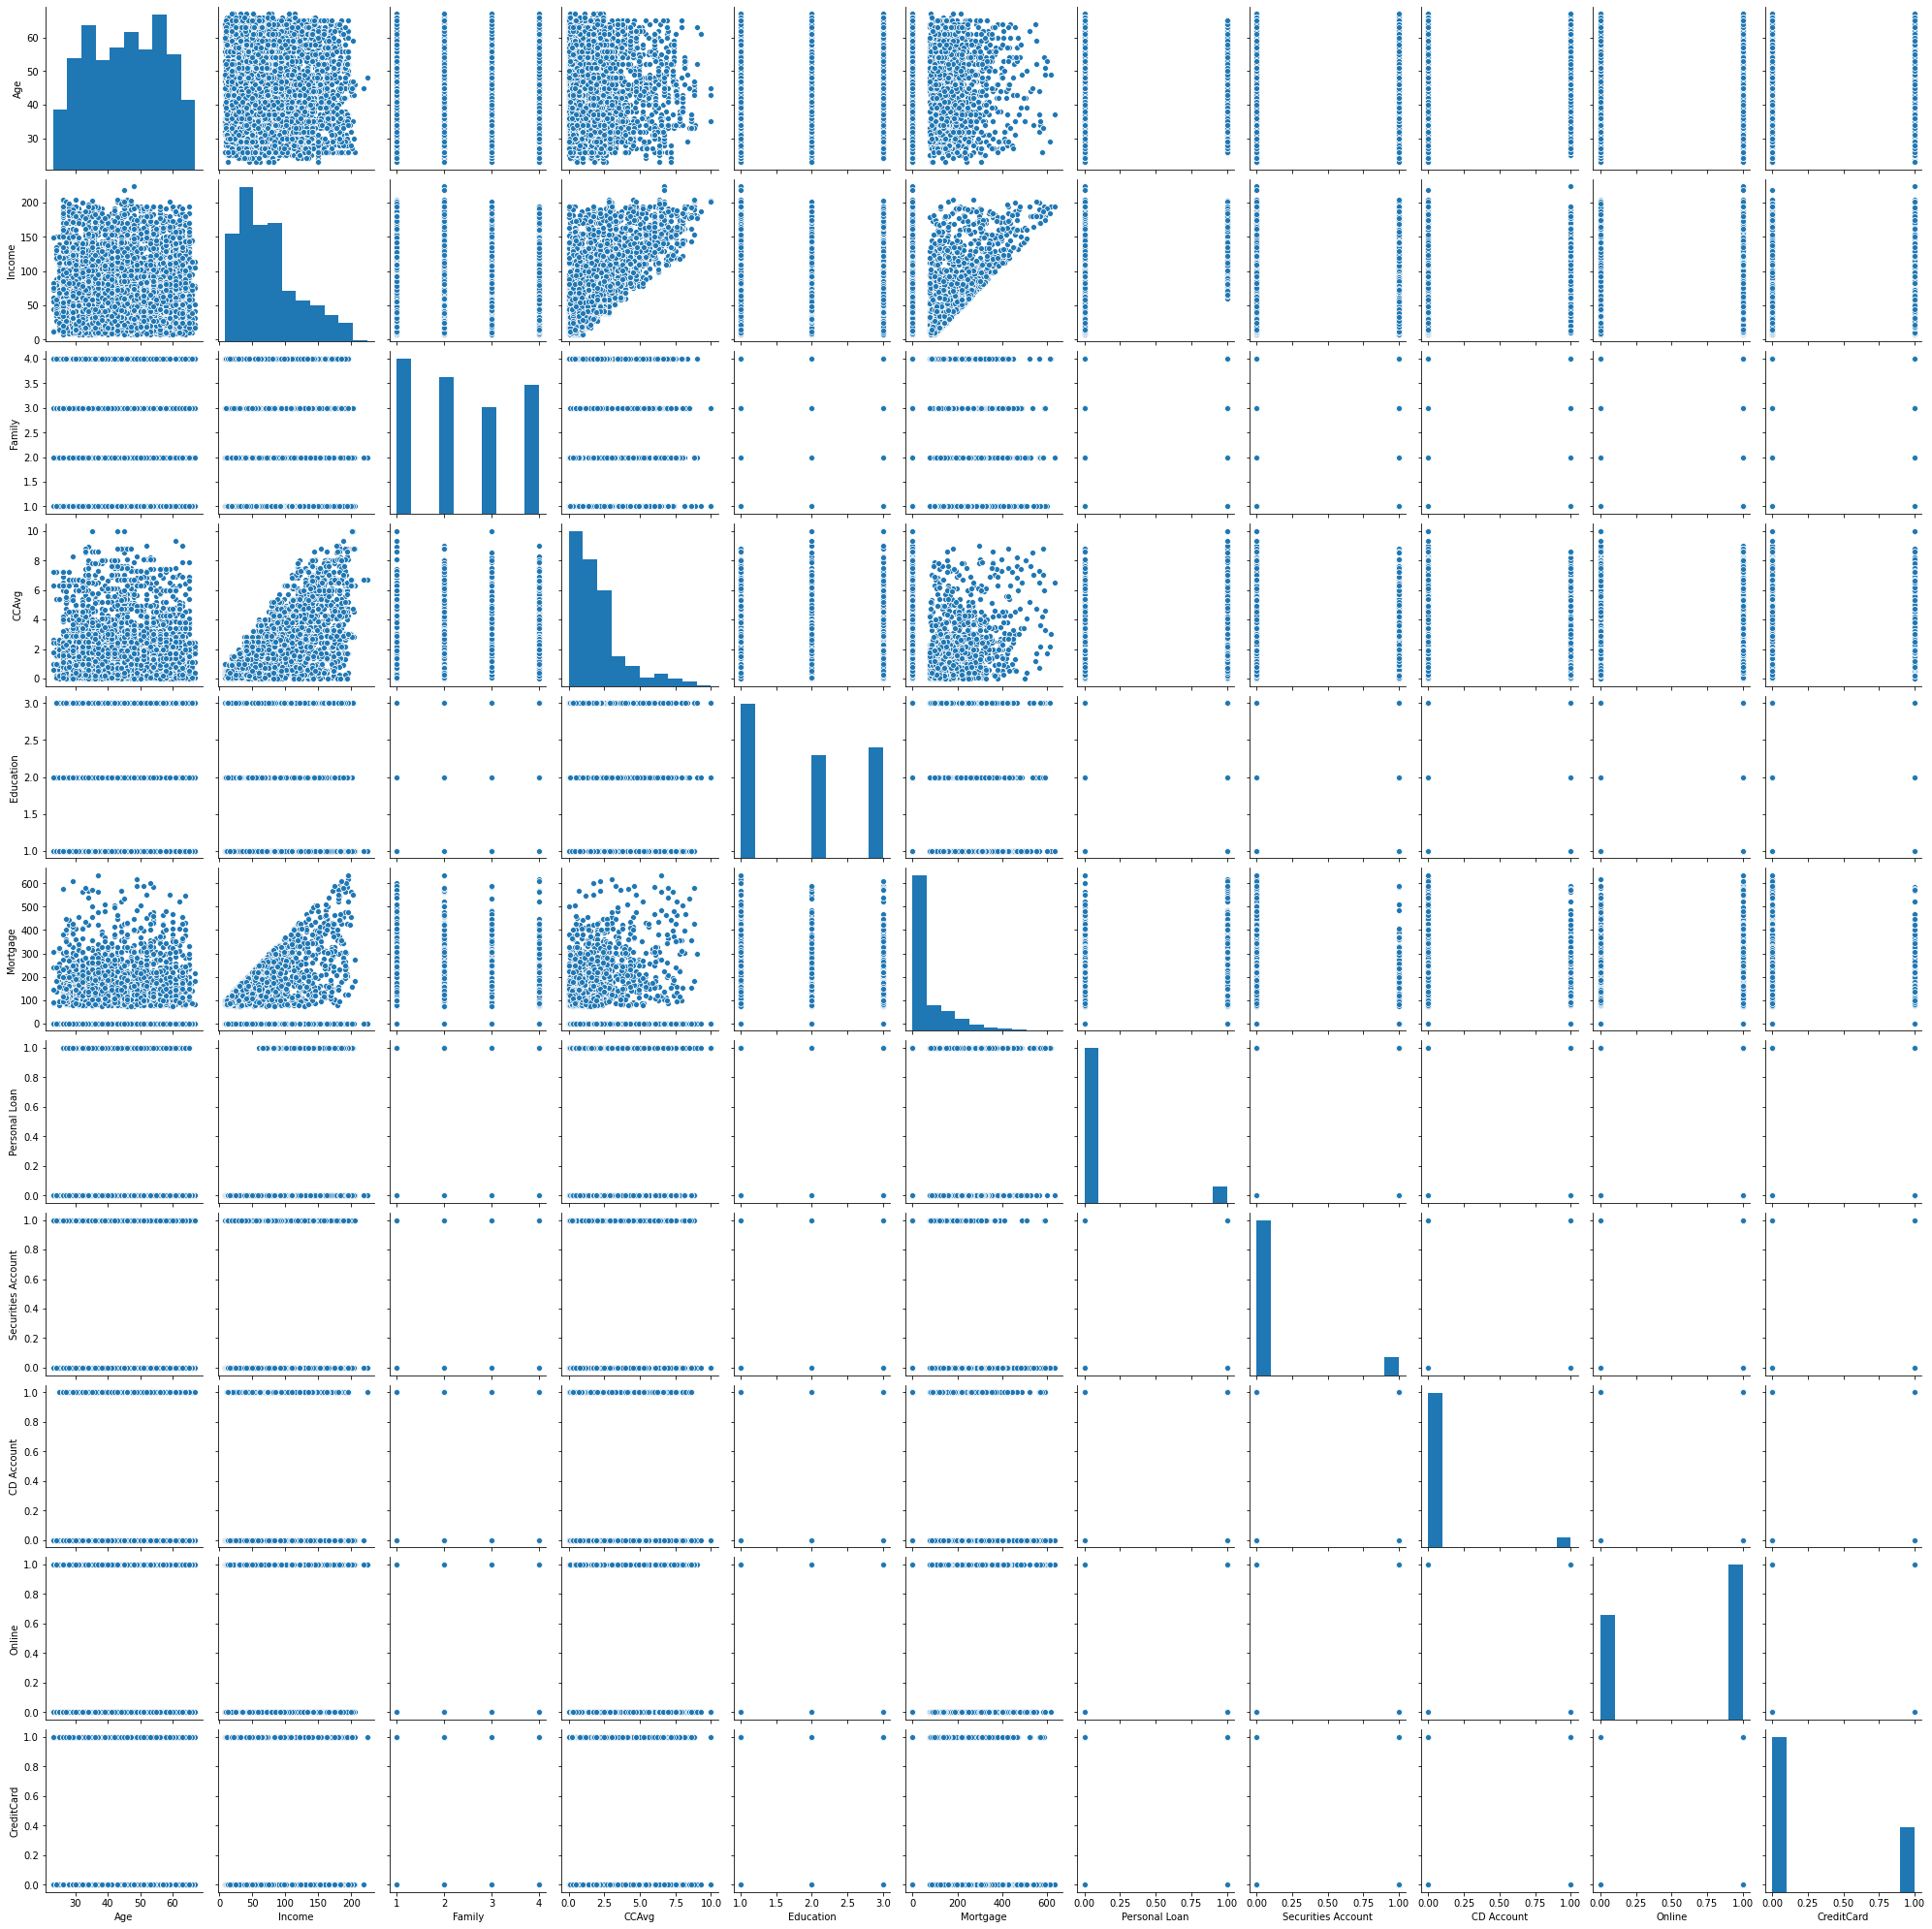

In [ ]:
sns.pairplot(dataset)

In [ ]:
data_X=dataset.loc[:,dataset.columns !="Personal Loan"]
data_Y=dataset[["Personal Loan"]]

# **4.Transformations for featured variables**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


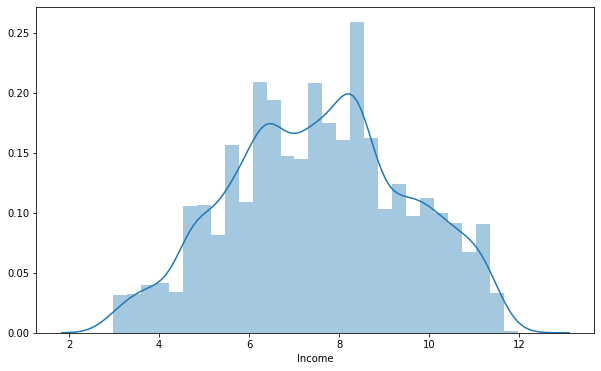

In [ ]:
from sklearn.preprocessing import PowerTransformer
 #################### POWER TRANSFORMATION  ####################

pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
pt_inc=pt.transform(data_X["Income"].values.reshape(-1,1))
data_X["Income"] = pd.Series(pt_inc.flatten())
sns.distplot(data_X['Income'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


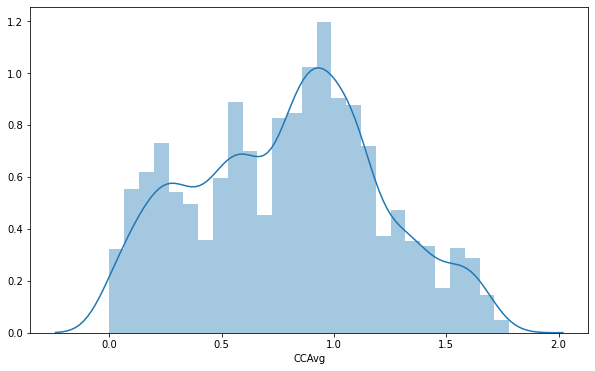

In [ ]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
pt_inc=pt.transform(data_X["CCAvg"].values.reshape(-1,1))
data_X["CCAvg"] = pd.Series(pt_inc.flatten())
sns.distplot(data_X['CCAvg'])

In [ ]:
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
 #################### MINMAX SCALER  ####################

df_scaled = dataset.copy()
col_names = ['Income', 'Age']
features = df_scaled[col_names]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,5.227273,5.949074,4,1.6,1,0,0,1,0,0,0
1,7.500000,5.601852,3,1.5,1,0,0,1,0,0,0
2,6.818182,5.069444,1,1.0,1,0,0,0,0,0,0
3,6.363636,7.129630,1,2.7,2,0,0,0,0,0,0
4,6.363636,5.856481,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,5.681818,5.740741,1,1.9,3,0,0,0,0,1,0
4996,5.795455,5.162037,4,0.4,1,85,0,0,0,1,0
4997,9.545455,5.370370,2,0.3,3,0,0,0,0,0,0
4998,9.772727,5.949074,3,0.5,2,0,0,0,0,1,0


In [ ]:
 #################### STANDARD SCALER  ####################

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled


,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-0.538229,4,1.6,1,0,0,1,0,0,0
1,-0.029524,-0.864109,3,1.5,1,0,0,1,0,0,0
2,-0.552992,-1.363793,1,1.0,1,0,0,0,0,0,0
3,-0.901970,0.569765,1,2.7,2,0,0,0,0,0,0
4,-0.901970,-0.625130,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-0.733757,1,1.9,3,0,0,0,0,1,0
4996,-1.338194,-1.276892,4,0.4,1,85,0,0,0,1,0
4997,1.540880,-1.081363,2,0.3,3,0,0,0,0,0,0
4998,1.715370,-0.538229,3,0.5,2,0,0,0,0,1,0


In [ ]:
df_scaled.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2.478018e-17,1.939449e-16,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1.000100e+00,1.000100e+00,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,-1.948906e+00,-1.428969e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,-9.019702e-01,-7.554825e-01,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,-2.952359e-02,-2.123482e-01,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,8.429230e-01,5.263146e-01,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.889859e+00,3.263712e+00,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
dataset["Income"].max(), dataset["Age"].max(), dataset['Personal Loan'].max()

(224, 67, 1)

In [ ]:
 #################### DATA BINING  ####################

data_X["Mortgage_Int"] = pd.cut(data_X["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)
data_X.drop("Mortgage", axis=1, inplace=True)

In [ ]:
data_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,4,0.845160,1,1,0,0,0,0
1,45,5.876952,3,0.814478,1,1,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,1,0


# **5,6.Normalise your data and split the data into training and test set in the ratio of 70:30 respectively and logistic regression**
 

In [ ]:
 #################### DATA SPLITTING  ####################

############### data splitted in to 70:30 ratio ##################
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=0)
train_X.reset_index(drop=True, inplace=True)
test_X.reset_index(drop=True, inplace=True)
train_Y.reset_index(drop=True, inplace=True)
test_Y.reset_index(drop=True, inplace=True)
print(train_X.shape)
print(test_X.shape)

print(train_Y.shape)
print(train_Y.shape)

(3500, 10)
(1500, 10)
(3500, 1)
(3500, 1)


In [ ]:
train_X.head() 

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,51,5.058173,3,0.322049,1,0,0,1,1,0
1,64,5.948841,1,0.814478,2,1,0,0,0,0
2,52,5.651776,4,0.902279,1,0,0,1,1,0
3,32,4.661500,1,0.384645,3,0,0,1,0,1
4,62,7.097040,1,0.544710,1,1,0,0,1,0


In [ ]:
#accuracy fro the testing model
###############   KNN CLASSIFIER  ######################
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn= KNeighborsClassifier(n_neighbors=3)
classifier_knn.fit(train_X,train_Y)
Y_pred=classifier_knn.predict(test_X)
print("acuuracy:",metrics.accuracy_score(test_Y,Y_pred))

acuuracy: 0.96


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


# **7.Print all the metrics related for evaluating the model performance**

In [ ]:
# all metrics related for evaluating the model performance
###############   KNN CLASSIFIER  ######################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
results=confusion_matrix(test_Y,Y_pred)
print('confusion_matrix')
print(results)
print('accuracy score',accuracy_score(test_Y,Y_pred))
print(' classification_report')
print( classification_report(test_Y,Y_pred))
print('roc_auc_score',roc_auc_score(test_Y,Y_pred))
print('log_loss',log_loss(test_Y,Y_pred))

confusion_matrix
[[1346   10]
 [  50   94]]
accuracy score 0.96
 classification_report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.90      0.65      0.76       144

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500

roc_auc_score 0.8227015732546705
log_loss 1.3815563864459628


In [ ]:
 #################### MAE & MSE  ####################

from sklearn.metrics import r2_score
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import mean_squared_error
print('R squared',r2_score(test_Y,Y_pred))
print('mean_absolute_error',mean_absolute_error(test_Y,Y_pred))
print('mean_squared_error',mean_squared_error(test_Y,Y_pred))

R squared 0.5390855457227138
mean_absolute_error 0.04
mean_squared_error 0.04


# **8.Build various other classification algorithms and compare their performance**

In [ ]:
########################## CLASSIFICATION ALGORITHM AND CAMPARING THE PERFORMANCE ###########################


from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
##converting dataframes to  numpy arrays
np_train_X=train_X.values
np_train_Y=train_Y.values
np_test_X=test_X.values
np_test_Y=test_Y.values

##Learners
cs_1 = LogisticRegression(random_state=0)
cs_2 = DecisionTreeClassifier(random_state=0,max_depth=8)
cs_3 =  RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)

##fitting cs_1 on train_x and predict on test_x
cs_1.fit(np_train_X, np_train_Y.ravel())
pred_1_test_X = cs_1.predict(np_test_X)
pred_1_train_X = cs_1.predict(np_train_X)
acc_1_train_X = accuracy_score(np_train_Y, pred_1_train_X)
acc_1_test_X = accuracy_score(np_test_Y, pred_1_test_X)
print("Acuuracy on trainig data of LogisticRegression: {:.4f}".format(acc_1_train_X))
print("Acuuracy on testing data of LogisticRegression: {:.4f}".format(acc_1_test_X))

##fitting cs_2 on train_x and predict on test_x
cs_2.fit(np_train_X, np_train_Y.ravel())
pred_2_test_X = cs_2.predict(np_test_X)
pred_2_train_X = cs_2.predict(np_train_X)
acc_2_train_X = accuracy_score(np_train_Y, pred_2_train_X)
acc_2_test_X = accuracy_score(np_test_Y, pred_2_test_X)
print("Acuuracy on trainig data of DecisionTreeClassifier: {:.4f}".format(acc_2_train_X))
print("Acuuracy on testing data of DecisionTreeClassifier: {:.4f}".format(acc_2_test_X))

##fitting cs_3 on train_x and predict on test_x
cs_3.fit(np_train_X, np_train_Y.ravel())
pred_3_test_X = cs_3.predict(np_test_X)
pred_3_train_X = cs_3.predict(np_train_X)
acc_3_train_X = accuracy_score(np_train_Y, pred_3_train_X)
acc_3_test_X = accuracy_score(np_test_Y, pred_3_test_X)
print("Acuuracy on trainig data of RandomForestClassifier: {:.4f} ".format(acc_3_train_X))
print("Acuuracy on testing data of RandomForestClassifier: {:.4f}".format(acc_3_test_X))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acuuracy on trainig data of LogisticRegression: 0.9537
Acuuracy on testing data of LogisticRegression: 0.9460
Acuuracy on trainig data of DecisionTreeClassifier: 0.9957
Acuuracy on testing data of DecisionTreeClassifier: 0.9813
Acuuracy on trainig data of RandomForestClassifier: 0.9949 
Acuuracy on testing data of RandomForestClassifier: 0.9873


In [ ]:
def draw_cm( actual, predicted):
  cm = confusion_matrix( actual, predicted)
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
  plt.ylabel('observed')
  plt.xlabel('predicted')
  plt.show()

In [ ]:
np_test_Y.shape

(1500, 1)

confusion matrix::


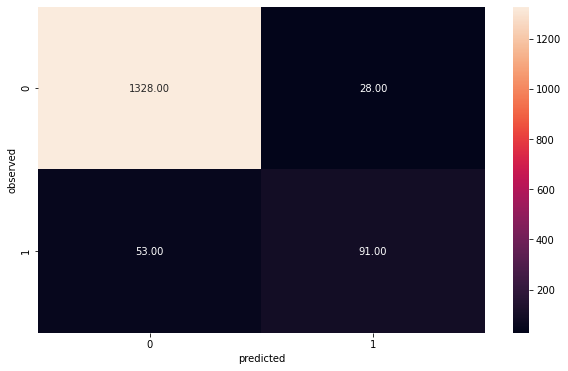

None


In [ ]:
print("confusion matrix::")
print(draw_cm(np_test_Y,pred_1_test_X.reshape(-1,1)))

In [ ]:

########### CLASSIFICATION REPORT FOR LOGISTIC REGRESSION ###############
from sklearn.metrics import classification_report
print(' classification_report')
print( classification_report(np_test_Y, pred_1_test_X))

 classification_report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.76      0.63      0.69       144

    accuracy                           0.95      1500
   macro avg       0.86      0.81      0.83      1500
weighted avg       0.94      0.95      0.94      1500



In [ ]:
########### CLASSIFICATION REPORT FOR DECISIONCLASSIFIER ###############
print( classification_report(np_test_Y, pred_2_test_X))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
########### CLASSIFICATION REPORT FOR RANDONFORESTCLASSIFIER ###############
print( classification_report(np_test_Y, pred_3_test_X))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



# **CONCLUSION:**
In this project the first step we imported the libraries and our data.then we found  out various things about our data.data is analysied using some pre build methods.

I. we have to make the model to predict whether a person will take personal loan or not.

II.we found that age and experience are highly correlated so we dropped the experience column.

III.ID and ZIPcode were not contibuting factors for a person to take loan so we dropped them.

IV.The Income and CCAvg column were left skewed so we have applied a powertransforamtion method to them to normalize the data.

V.The mortgage column has also skewed but since it was discrete so rather than power transformation we used binning technique.
And we have used many models to predict the data

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



+++++++++++++++++++++++++++++ RANDOM FOREST CLASSIFIER +++++++++++++++++++++++

ACCURACY_SCORE = 0.9949

CLASSIFICATION REPORT

                    precision    recall  f1-score   support

              0        0.99      1.00      0.99      1356
              1        0.98      0.90      0.94       144

    accuracy                               0.99      1500
    macro avg          0.99      0.95      0.97      1500
    weighted avg       0.99      0.99      0.99      1500

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


+++++++++++++++++++++++++++++ KNN CLASSIFIER +++++++++++++++++++++++++++++++

ACCURACY_SCORE = 0.9413333333333334

CLASSIFICATION REPORT 

                    precision    recall  f1-score   support

           0           0.95      0.99      0.97      1356
           1           0.82      0.50      0.62       144

    accuracy                               0.94      1500
    macro avg          0.88      0.74      0.79      1500
    weighted avg       0.94      0.94      0.93      1500

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


+++++++++++++++++++++++++++++ LOGISTIC REGRESSION +++++++++++++++++++++++

ACCURACY_SCORE = 0.9520

CLASSIFICATION REPORT 

                     precision    recall  f1-score   support
 
           0           0.96      0.98      0.97      1356
           1           0.81      0.60      0.69       144

    accuracy                               0.95      1500
    macro avg          0.88      0.79      0.83      1500
    weighted avg       0.94      0.95      0.94      1500

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

+++++++++++++++++++++++++++++ DECISION CLASSIFIER ++++++++++++++++++++++++++


ACCURACY_SCORE = 0.9954

CLASSIFICATION REPORT


                    precision    recall  f1-score   support

           0           0.99      0.99      0.99      1356
           1           0.92      0.92      0.92       144

    accuracy                               0.99      1500
    macro avg          0.96      0.96      0.96      1500
    weighted avg       0.99      0.99      0.99      1500

    
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@